# KNN -  K Nearest Neighbors - Classification

To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level

## Imports

In [3]:
import numpy as np
import pandas as pd

## Data

In [5]:
df = pd.read_csv('gene_expression.csv')

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Train|Test Split and Scaling Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Evaluation

### Metrics
*****************************************************************************************************************
Accuracy: measures the proportion of correctly classified cases from the total number of objects in the dataset.\
Precision: measures the ability of the model to detect only relevant instances\
Recall: measures the ability of the model to detect all instances of a class
*****************************************************************************************************************

#### 1. Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### 2. Precision
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

#### 3. Recall
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Where:
- \( TP \) = True Positives
- \( TN \) = True Negatives
- \( FP \) = False Positives
- \( FN \) = False Negatives

In [60]:
y_pred = knn_model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.9066666666666666

In [21]:
confusion_matrix(y_test,y_pred)

array([[410,  54],
       [ 30, 406]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       464
           1       0.88      0.93      0.91       436

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [24]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [25]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K Value')

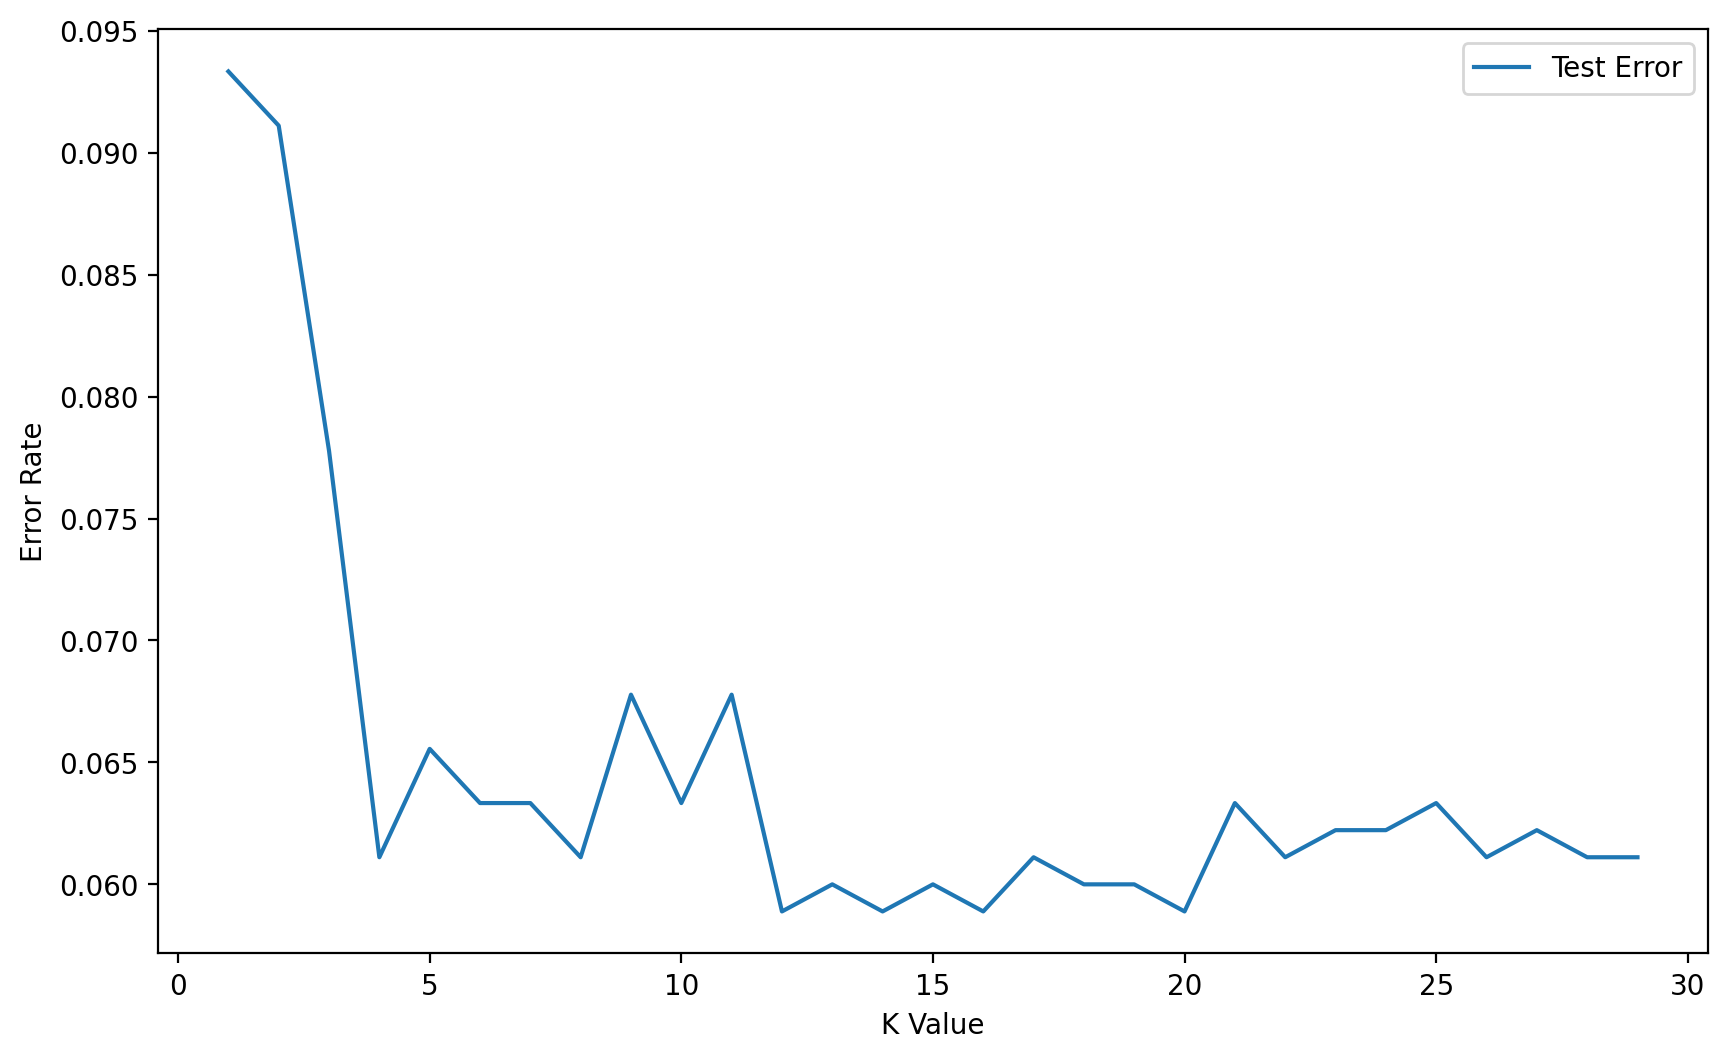

In [26]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

## Final Model



In [28]:

knn5 = KNeighborsClassifier(n_neighbors=5)


In [29]:
knn5.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn5.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71       464
           1       0.68      0.98      0.80       436

    accuracy                           0.76       900
   macro avg       0.82      0.77      0.76       900
weighted avg       0.83      0.76      0.75       900



In [32]:
confusion_matrix(y_test,y_pred)

array([[261, 203],
       [  9, 427]], dtype=int64)